In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*El siguiente dataset contiene información sobre cursos disponibles en la plataforma Udemy. Cada registro representa un curso y cuenta con información detallada sobre su título, descripción, características y atributos relevantes para los usuarios. Los atributos incluyen información sobre el precio, la cantidad de estudiantes inscritos, la calificación promedio, la cantidad de comentarios y la duración total del contenido del curso. Además, se clasifica cada curso en diferentes áreas temáticas y el idioma en el que se imparten. Dicho dataset puede ser utilizado para estudios de mercado y análisis de la industria de aprendizaje en línea.*

Preguntas e hipótesis a abordar:

* ¿Cuáles son las categorías de cursos más populares en la plataforma Udemy? 

Al analizar las categorías de cursos más populares en Udemy, podemos identificar las tendencias en la demanda de cursos en la plataforma y determinar qué temas son los más buscados por los estudiantes. Lo cual sería de relevancia tanto para la plataforma, como para los proveedores de cursos, al saber cuáles son las categorías más demandadas.

* ¿Cómo se relaciona el precio de los cursos con el número de estudiantes inscritos?

Al tomar en cuenta cómo se relaciona el precio de los cursos con el número de estudiantes inscritos, podemos entender la dinámica del mercado y ajustar la oferta de cursos de acuerdo con la demanda. Esto puede ayudar a los proveedores de cursos a fijar precios acuerdo con la demanda del mercado, y le permite a la plataforma saber cuáles son los cursos con mayor rentabilidad. 

* ¿Cómo varía la popularidad de los cursos en función de su idioma y su categoría temática en Udemy? 

Analizando como varía la popularidad de los cursos en función de su idioma y su categoría temática, podemos mejorar la experiencia del usuario en la plataforma. Por ejemplo, si encontramos que los estudiantes están buscando cursos en un idioma específico o en una categoría en particular, podemos mejorar la accesibilidad y la visibilidad de los cursos en estas áreas. También, permite identificar tendencias en el mercado.






In [ ]:
data_udemy = pd.read_csv('/content/Course_info.csv') #leemos el archivo csv.
data_udemy.head() 

In [ ]:
data_udemy.info()

In [ ]:
data_udemy.isna().sum().sort_values(ascending = False) #veo la cantidad de datos nulos. 

In [ ]:
data_udemy.drop(columns = ['last_update_date', 'instructor_url', 'topic'], inplace = True)
data_udemy #elimino las siguientes columnas ya que contienen muchos valores nulos y no van a ser de relevancia para los objetivos de mi analisis.

# ***¿Cuáles son las categorías de cursos más populares en la plataforma Udemy?***

In [ ]:
inscritos_por_categoria = data_udemy.groupby('category')['num_subscribers'].sum()

In [ ]:
inscritos_por_categoria = inscritos_por_categoria.sort_values(ascending=False)

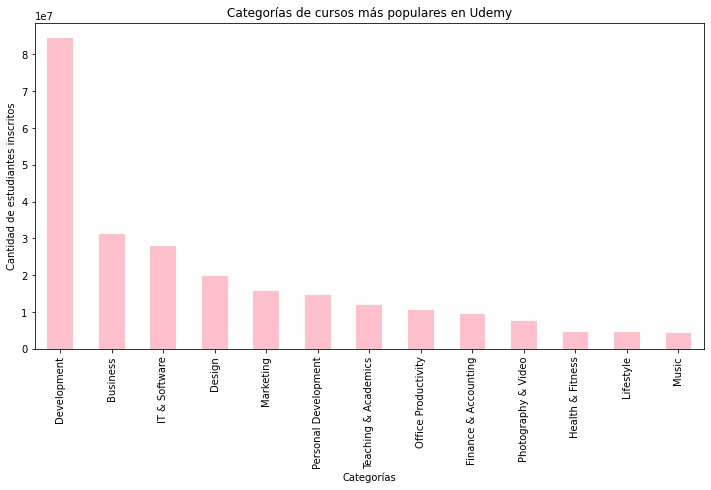

In [ ]:
plt.figure(figsize=(12,6))
inscritos_por_categoria.plot(kind='bar', color='pink')
plt.title('Categorías de cursos más populares en Udemy')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de estudiantes inscritos')
plt.show()

In [ ]:
num_cursos_por_categoria = data_udemy.groupby('category')['id'].count()
num_cursos_por_categoria = num_cursos_por_categoria.sort_values(ascending=False)

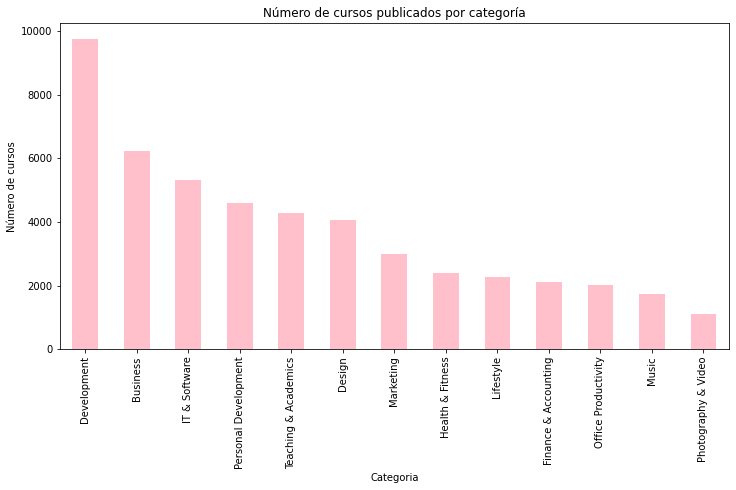

In [ ]:
plt.figure(figsize=(12, 6))
num_cursos_por_categoria.plot(kind='bar', color='pink')
plt.title('Número de cursos publicados por categoría')
plt.xlabel('Categoria')
plt.ylabel('Número de cursos')
plt.show()

Por lo tanto, en ambas visualizaciones podemos observar que la categoría con mayor número de estudiantes inscritos, y mayor número de cursos publicados por categoría es 'Develpment', seguido de 'Business', y en tercer lugar 'IT & Software'. Esto puede ser de utilidad, tanto para la plataforma, y especialmente para los estudiantes, ya que denota una tendencia de mercado por cierta categoría de cursos. De cierta forma también puede expresar la necesidad y la demanda en los sectores de desarrollo, empresas e IT. 

# ***¿Cómo se relaciona el precio de los cursos con el número de estudiantes inscritos?***

In [ ]:
inscritos_x_precio = data_udemy.groupby('price')['num_subscribers'].sum()

In [ ]:
inscritos_x_precio = inscritos_x_precio[inscritos_x_precio.index > 0]

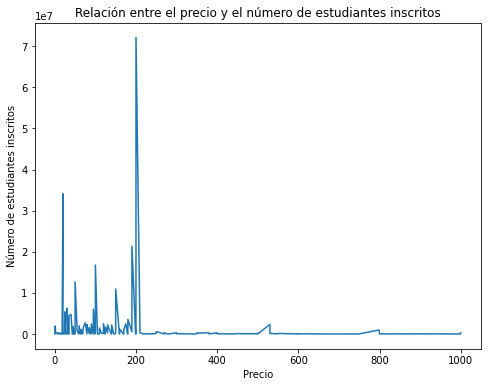

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(inscritos_x_precio.index, inscritos_x_precio.values)
plt.title('Relación entre el precio y el número de estudiantes inscritos')
plt.xlabel('Precio')
plt.ylabel('Número de estudiantes inscritos')
plt.show()

En este caso, observamos que generalmente, el mayor número de inscritos se encuentra en el rango de precios de hasta 200 dólares. Pero particularmente vemos un incremento de inscritos frente a cursos que cuestan entre 200 dólares apróximadamente. Y, habiendo una drástica disminución de inscritos en cursos que cuestan más de 200 dólares, estos datos pueden ser de suma relevancia a la hora de analizar que cursos tienen mayor rentabilidad, y cuál es la sensibilidad de los estudiantes en relación al precio de los cursos. Permitiéndoles a los proveedores de cursos, ajustar sus precios a la demanda actual. 

# ***¿Cómo varía la popularidad de los cursos en función de su idioma y su categoría temática en Udemy?***

In [ ]:
popularidad_segun_idioma_y_categoria = data_udemy.groupby(['language', 'category'])['num_subscribers'].sum()

popularidad_segun_idioma_y_categoria = pd.DataFrame(popularidad_segun_idioma_y_categoria).reset_index()

popularidad_segun_idioma_y_categoria = popularidad_segun_idioma_y_categoria.sort_values('num_subscribers', ascending=False)

In [ ]:
idiomas_populares = popularidad_segun_idioma_y_categoria['language'].unique()[:10]

popularidad_segun_idioma_y_categoria = popularidad_segun_idioma_y_categoria[popularidad_segun_idioma_y_categoria['language'].isin(idiomas_populares)]

In [ ]:
categorias_populares = popularidad_segun_idioma_y_categoria['category'].unique()[:10]

popularidad_por_idioma_categoria = popularidad_segun_idioma_y_categoria[popularidad_segun_idioma_y_categoria['category'].isin(categorias_populares)]

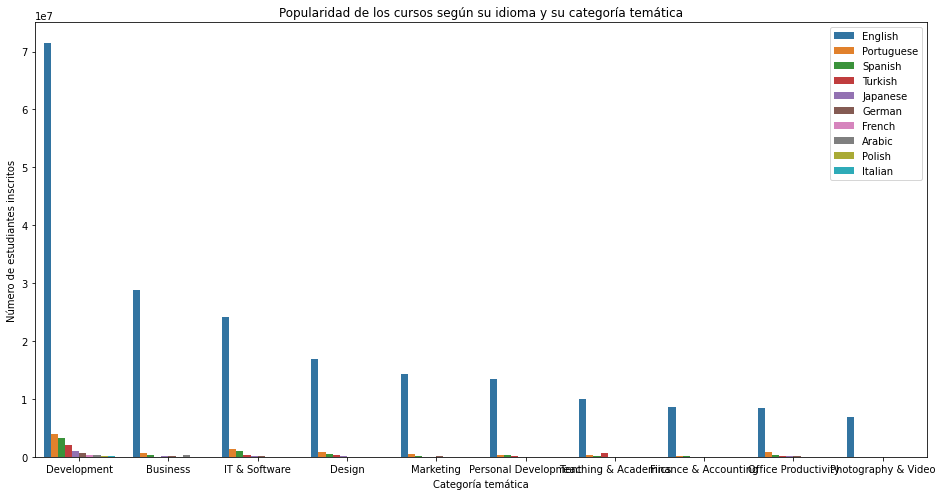

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='category', y='num_subscribers', hue='language', data=popularidad_por_idioma_categoria)
plt.title('Popularidad de los cursos según su idioma y su categoría temática')
plt.xlabel('Categoría temática')
plt.ylabel('Número de estudiantes inscritos')
plt.legend()
plt.show()

Por lo tanto, mediante la visualización, podemos inferir que en la categoría con mayor popularidad; Development, el idioma que predomina es el inglés, seguido luego por el portugués y el español. En las siguientes categorías podemos observar que, entre el idioma inglés, y los demás 9 idiomas más populares, hay una diferencia muy significativa, siendo el inglés el idioma que predomina por excelencia en dichos cursos. 